<a href="https://colab.research.google.com/github/Mhtag/tensorflow/blob/main/06_image_classification_with_cnns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [2]:
(train_data, train_labels),(test_data, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


## Explore the data

In [3]:
# show the first training example

print(f'training example:\n{train_data[0]}\n')
print(f'training label:\n{train_labels[0]}')

training example:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1 

In [4]:
train_data[0].shape, train_data.shape

((28, 28), (60000, 28, 28))

In [5]:
# create a small list 
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
len(class_names)

10

### Vizualize the Data

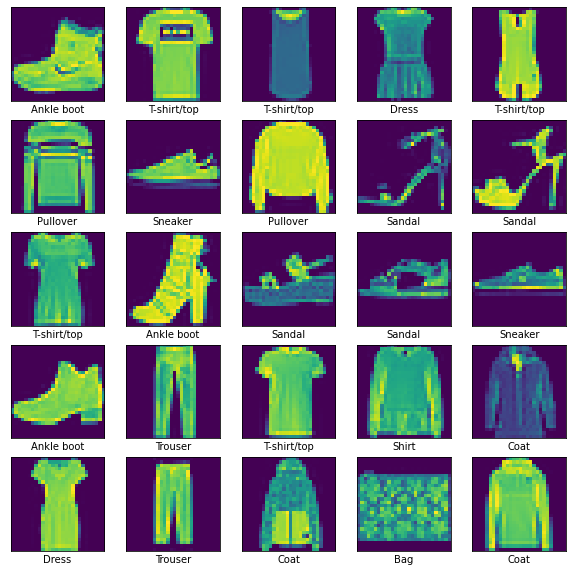

In [6]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,1+i)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(train_data[i])
  plt.xlabel(class_names[train_labels[i]])
plt.show()

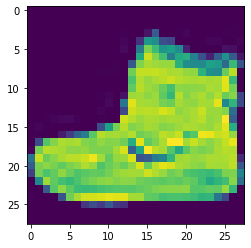

In [7]:
plt.imshow(train_data[0])

## Preprocess the data

In [8]:
# Check the max and min value of our data set
train_data.max(), train_data.min()

(255, 0)

In [9]:
# normalizing our data
train_data_norm = train_data/255
test_data_norm = test_data/255

train_data_norm[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [10]:
# Canging the dmension of our data set as conv2D requite 4 dimensional data set
train_data_norm_exp = np.expand_dims(train_data_norm, axis=-1).astype('float32')
test_data_norm_exp = np.expand_dims(test_data_norm, axis=-1).astype('float32')
train_data_norm_exp[0].shape, test_data_norm_exp[0].shape


((28, 28, 1), (28, 28, 1))

### Vizualize the processed data

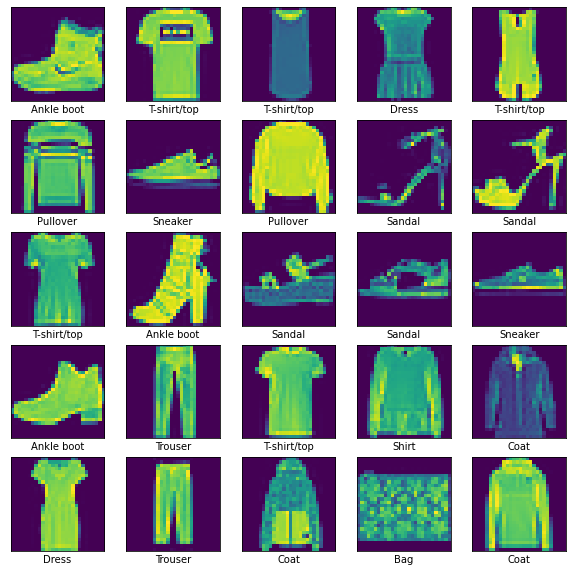

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,1+i)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(train_data_norm[i])
  plt.xlabel(class_names[train_labels[i]])
plt.show()

## Built the model

In [12]:
model_1 = tf.keras.Sequential([
                               tf.keras.layers.Conv2D(32, (3,3), activation='relu',padding='same', input_shape=(28,28,1)),
                               tf.keras.layers.MaxPooling2D((2,2)),
                               tf.keras.layers.Conv2D(64, (3,3),padding='same', activation='relu'),
                               tf.keras.layers.MaxPooling2D((2,2)),
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(128, activation='relu'),
                               tf.keras.layers.Dense(10, activation='softmax')
])

In [13]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               401536    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

### Compile the Model

In [14]:
model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer='Adam',
                metrics=['accuracy'])



### Train the Model

In [15]:
history_1 = model_1.fit(train_data_norm_exp, train_labels, epochs=10)

                        #validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 41s 6ms/step - loss: 0.4006 - accuracy: 0.8561
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2646 - accuracy: 0.9043
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2204 - accuracy: 0.9187
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1915 - accuracy: 0.9298
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1628 - accuracy: 0.9392
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1418 - accuracy: 0.9466
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1200 - accuracy: 0.9550
Epoch 8/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1005 - accuracy: 0.9629
Epoch 9/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0875 - accuracy: 0.9671
Epoch 10/10
1875/1875 [==============================] - 11s 6ms/step - l

### Making prediction

In [16]:
y_probs = model_1.predict(test_data_norm_exp)

y_probs[0], tf.argmax(y_probs[0]), class_names[tf.argmax(y_probs[0])]

(array([9.4053297e-07, 1.6020361e-10, 2.1222966e-10, 8.2787215e-12,
        8.1202427e-11, 8.2613251e-06, 6.4172878e-10, 7.8271455e-07,
        6.1440797e-10, 9.9998999e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle boot')

In [17]:
# convert all the probabilities into integers
y_pred = y_probs.argmax(axis=1)
y_pred[:5]

array([9, 2, 1, 1, 0])

In [23]:
y_pred[5] == test_labels[5]

True

In [25]:
class_names[test_labels[5]]

'Trouser'

### Confusion Matrix

In [ ]:
cm = confusion_matrix(test_labels, y_pred)
cm

In [ ]:
cm_df = pd.DataFrame(cm,
                     index=class_names,
                     columns=class_names)
cm_df

In [ ]:
# Plotting the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm_df, annot=True, fmt='d', cmap=plt.cm.Blues)
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()

In [41]:

def plot_image(images, prediction, classes, image_no):

  """Plot the test image and labels them for for the prediction as well as
    actual name. if the prediction is correct our label is in green color otherwise in red color"""

  images = images/255.0
  #test_data_norm_exp = np.expand_dims(images, axis=-1).astype('float32')
  plt.imshow(images[image_no])
  pred_label = classes[prediction[image_no]]
  true_label = classes[test_labels[image_no]]
  plt.xticks([])
  plt.yticks([])

  if y_pred[image_no] == test_labels[image_no]:
    color='green'
    plt.title('Correct Prediction', color=color)
  else:
    color='red'
    plt.title('Wrong Prediction', color=color)

  plt.xlabel(f'Predicted:{pred_label}  Actual:{true_label}', color=color)
  plt.show()


  
#test_data_norm_exp = np.expand_dims(test_data_norm, axis=-1).astype('float32')


enter the image no please2


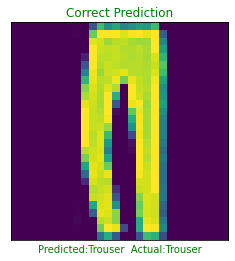

enter the image no please9


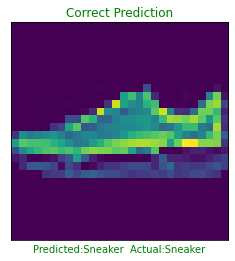

enter the image no please250


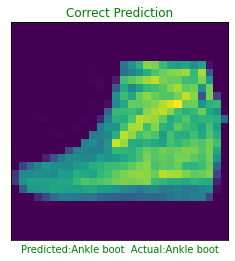

enter the image no please4


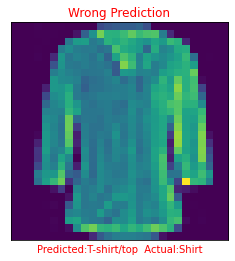

KeyboardInterrupt: ignored

In [42]:
while True:
  image_num = int(input('enter the image no please',))
  plot_image(test_data, y_pred, class_names, image_no=image_num)



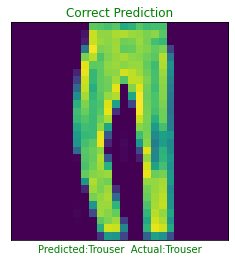

In [37]:
plot_image(test_data, y_pred, class_names, 5)